# 📦 EDA Order Items – Shopee Analytics

Analisis detail item per pesanan untuk memahami kebiasaan belanja pengguna.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_items = pd.read_csv("../data/raw/order_items.csv")
df_items.head()

,order_id,product_id,category,quantity,price
0,O000001,P0111,Kecantikan,3,1092380
1,O000001,P0376,Fashion,4,840921
2,O000001,P0439,Rumah Tangga,1,1782244
3,O000001,P0052,Fashion,5,2371483
4,O000002,P0280,Elektronik,3,373308


## 📊 Jumlah Produk per Order

Berapa banyak produk rata-rata dalam satu pesanan?

📁 Chart saved to outputs/charts/produk_per_order_distribution.png


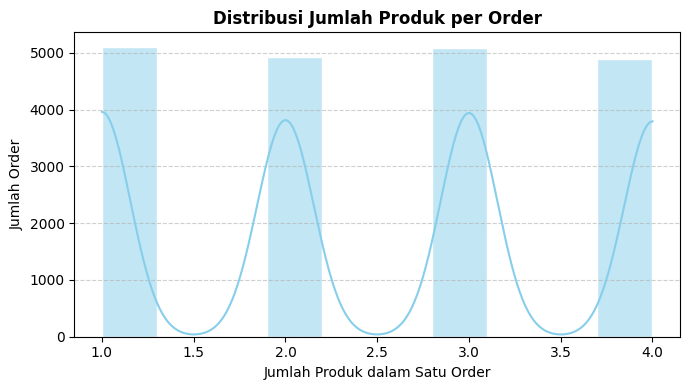

In [6]:
produk_per_order = df_items.groupby('order_id').size().reset_index(name='jumlah_produk')
plt.figure(figsize=(7, 4))
sns.histplot(produk_per_order['jumlah_produk'], bins=10, kde=True, color='skyblue', edgecolor='white')
plt.title("Distribusi Jumlah Produk per Order", fontsize=12, weight='bold')
plt.xlabel("Jumlah Produk dalam Satu Order")
plt.ylabel("Jumlah Order")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

save_plot(plt.gcf(), "produk_per_order_distribution.png")
plt.show()


## 🏷️ 10 Kategori Paling Sering Dibeli

📁 Chart saved to outputs/charts/top10_kategori_dipesan.png


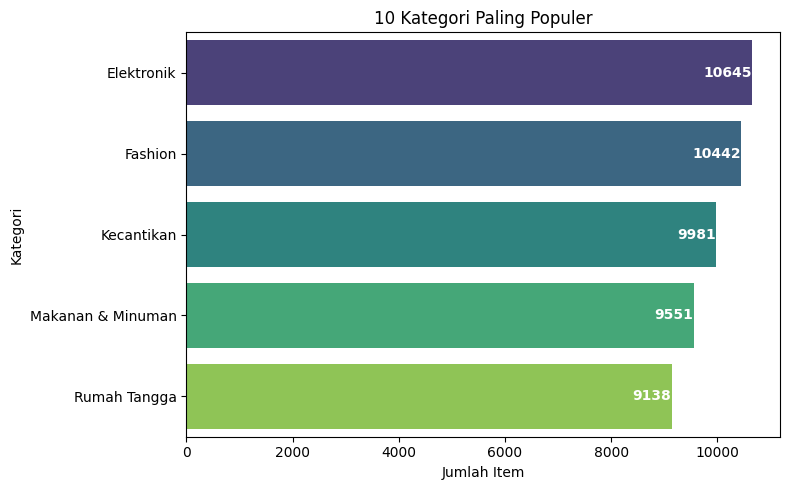

In [20]:
kategori_teratas = df_items['category'].value_counts().head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=kategori_teratas.values, y=kategori_teratas.index, palette='viridis',hue=kategori_teratas.index)

for i, v in enumerate(kategori_teratas.values):
    ax.text(v - 5, i, str(v), color='white', va='center', ha='right', fontweight='bold')

plt.title("10 Kategori Paling Populer")
plt.xlabel("Jumlah Item")
plt.ylabel("Kategori")
plt.tight_layout()

save_plot(plt.gcf(), "top10_kategori_dipesan.png")
plt.show()

## 📦 Distribusi Kuantitas Produk yang Dipesan

📁 Chart saved to outputs/charts/boxplot_kuantitas_produk.png


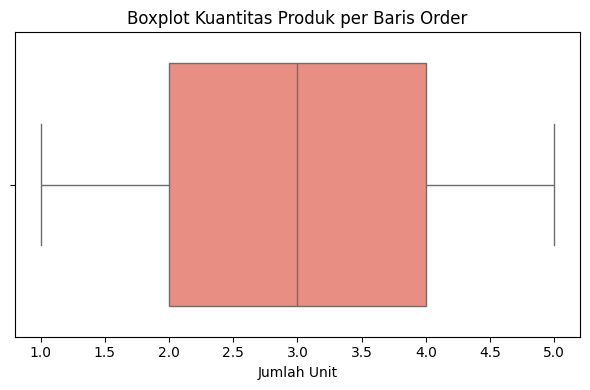

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_items, x='quantity', color='salmon')

plt.title("Boxplot Kuantitas Produk per Baris Order")
plt.xlabel("Jumlah Unit")
plt.tight_layout()

save_plot(plt.gcf(), "boxplot_kuantitas_produk.png")
plt.show()

## 📝 Insight Order Items

- Mayoritas order berisi 1–2 produk.
- Kategori favorit: Elektronik & Fashion.
- Beberapa pesanan membeli 4–5 produk sekaligus (bulk buyer).

📎 Selesai! EDA semua tabel sudah selesai:
- ✅ `users`
- ✅ `products`
- ✅ `orders`
- ✅ `payments`
- ✅ `order_items` (sekarang)

Next:
- `gabung semua ke 1 file ipynb`
- `buat dashboard`
- `buat README GitHub`